In [ ]:
# Abdülhalim YAYDEMİR

Dosya içeriği(bakarak yazdırma) :

P5 pgm formatı
genişlik(width)= 256
yükseklik(height)= 256
maxval= 255


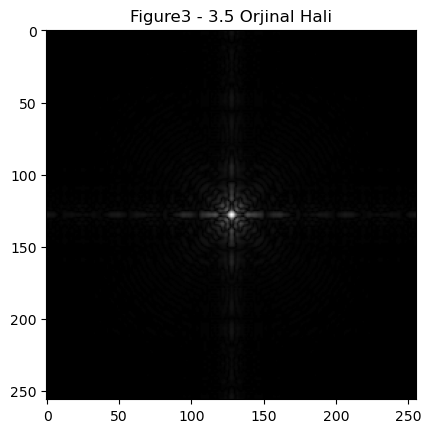

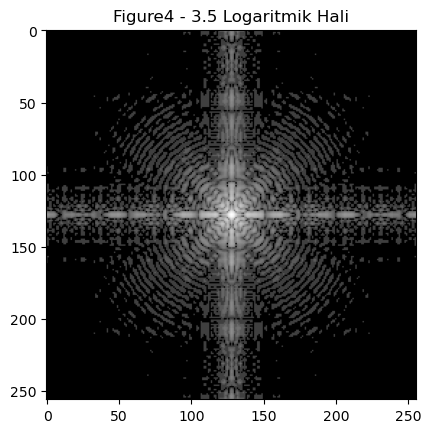

In [5]:
import math # matematiksel işlemler için gerekli
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli


#################functions#################
def logaritma(a):
    a=math.floor(c*(math.log10(float(a)+1.0)))
    return a
###########################################


#Fig0305(a)(DFT_no_log).pgm dosyası 'rb' modunda açılarak okundu.
with open("Fig0305(a)(DFT_no_log).pgm", "rb") as fileObject:
    fileContent=fileObject.read()
    
    
    
    #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı sonra alt satıra geçildi.
    print('Dosya içeriği(bakarak yazdırma) :\n')
    i=0
    while fileContent[i]!=10:
        if i==0:
            if (fileContent[0]==80) & (fileContent[1]==53):
                print('P5 pgm formatı')  
            else:
                print('P5 pgm formatı değil')
        i=i+1

    
    
    
    # '#' ile başlayan satır geçildi.
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1
    
    
    
    
    # genişlik yükseklik bilgileri yazdırıldı
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1  
        else:
            string=[]
            while fileContent[i]!=32:
                width=chr(fileContent[i])
                string.append(width)       
                i=i+1
                
            string=''.join(string)
            width=int(string)
            print("genişlik(width)=",width)
            i=i+1
            string=[]
            
            while fileContent[i]!=10:
                height=chr(fileContent[i])
                string.append(height)
                i=i+1
                
            string=''.join(string)
            height=int(string)
            print("yükseklik(height)=",height)
                   
    
                        
            
    # maxval değeri yazdırıldı
    i=i+1
    string=[]
    while fileContent[i]!=10:
        maxval=chr(fileContent[i])
        string.append(maxval)       
        i=i+1
    
    string=''.join(string)
    maxval=int(string)
    print("maxval=",maxval)
    
    
    # orjinal görüntüyü ekrana yazdırmak için oluşturuldu
    fileContent2=bytearray(fileContent)
    
    
    # pikseller üzerinde  logaritmik işlem gerçekleştirildi
    i=i+1
    # c değeri 1'den farklı ayarlandı
    c=255.0/math.log10(256)
    j=1
    b=i
    fileContent=bytearray(fileContent)
    while 1:    
        fileContent[i]=logaritma(fileContent[i])
        i=i+1
        j=j+1
        if j==height*width+1:
            break
            
            
            
    # logaritmik işlemden geçirilen pikseller imshow() komutunda kullanılmak üzere arraya geçirildi
    i=b
    f=np.arange(height*width).reshape((height,width))      
    for m in range(height):
        for n in range(width):
            f[m][n]=fileContent[i]
            i=i+1
            
            
    # orjinal pikseller imshow() komutunda kullanılmak üzere arraya geçirildi
    i=b
    f2=np.arange(height*width).reshape((height,width))      
    for m in range(height):
        for n in range(width):
            f2[m][n]=fileContent2[i]
            i=i+1            
            
            
            
    # dosyaya yazdırılmak için byte tipine dönüştürüldü
    fileContent=bytes(fileContent)

            
        
        
        
# dosyanın yeni hali 3.5(log).pgm isimli dosyaya yazdırıldı
with open("3.5(log).pgm", "wb") as fileObject:
    fileObject.write(fileContent)        
    
    
# orjinal görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure3 - 3.5 Orjinal Hali")
plt.imshow(f2,cmap='gray',vmin=0, vmax=255)      
    
    
    
# işlenmiş görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure4 - 3.5 Logaritmik Hali")
plt.imshow(f,cmap='gray',vmin=0, vmax=255)

# Sonuç

In [ ]:
# Bu bölümde görüntünün logaritmik ifadeden geçirilmiş hali elde edildi
# figure3'de yani görüntünün orjinalinde gözükmeyen kısımlar figure4'de daha belirgin hale geldi
# formüldeki c sabiti 255 piksel girişinden 255 piksel çıkışı elde edilecek şekilde ayarlandı
# formüldeki 1 ise 0 piksel girişine karşılık 0 piksel çıkışı elde etmeye imkan vermekte, tanımsız olma durumunu engellemektedir